# Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [4]:
#Uploads dataset.
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
#Checks for information of rows and columns in dataset.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
#Looks for number of unique users in the dataset.
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
#Proportion of users converted.
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
#Finds number of times the new_page and treament don't match
nomatch1 = df.query('group == "treatment" and landing_page != "new_page"')['user_id'].count()
nomatch2 = df.query('group != "treatment" and landing_page == "new_page"')['user_id'].count()

#Sums the results 
print("Number of times the new_page and treatment don't match: ", nomatch1+nomatch2)

Number of times the new_page and treatment don't match:  3893


f. Do any of the rows have missing values?

In [9]:
#It doesn't seem there are any missing values in the dataframe
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

b. How many unique **user_id**s are in **df2**?

In [12]:
#The number of unique ids in df2.
df2.user_id.nunique()

290584

c. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#Find duplicated user_id
df2[df2.duplicated(['user_id'], keep=False)]['user_id'] 
#User 773192 is duplicated 

1899    773192
2893    773192
Name: user_id, dtype: int64

d. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id'] == 773192]
#The user 773192 has two different timestamp

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


e. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192] #Shows only one row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
converted_users = float(df2.query('converted == 1')['user_id'].nunique())
prob = converted_users/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is:", prob)

The probability of an individual converting regardless of the page they receive is: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
converted_ctr = float(df2.query('group == "control" and converted == 1')['user_id'].nunique())
ctr_users =float(df2.query('group == "control"')['user_id'].nunique())
prob_ctr = converted_ctr /ctr_users
print("Given that an individual was in the control group, the probability they converted is", prob_ctr)

Given that an individual was in the control group, the probability they converted is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
converted_trt = float(df2.query('group == "treatment" and converted == 1')['user_id'].nunique())
trt_users =float(df2.query('group == "treatment"')['user_id'].nunique())
prob_trt = converted_trt /trt_users
print("Given that an individual was in the control group, the probability they converted is", prob_trt)

Given that an individual was in the control group, the probability they converted is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [19]:
converted_np = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
prob_np = converted_np/float(df2.shape[0])
print("The probability that an individual received the new page:", prob_np)

The probability that an individual received the new page: 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> The probablity users converted in both control, 12.04%, and treatment , 11.88%, groups is pretty close to each other. 
> At 11.96% the probability of an individual converting regardless of the page they receive is not significant to conclude that the new page is leading to more conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<center> H0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 < = 0 </center>
<center> H1 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0  </center>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
#Compute new success rate regardless of page 
p_new = round(float(df2.query('converted == 1')['user_id'].nunique()))/float(df2['user_id'].nunique())
print("The conversion rate for 𝑝𝑛𝑒𝑤 under the null {0:.2%}".format(p_new))

The conversion rate for 𝑝𝑛𝑒𝑤 under the null 11.96%


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
#Conmpute old success rate regardless of page 
p_old = round(float(df2.query('converted == 1')['user_id'].nunique()))/float(df2['user_id'].nunique())
print("The conversion rate for 𝑝𝑜𝑙𝑑 under the null {0:.2%}".format(p_old))

The conversion rate for 𝑝𝑜𝑙𝑑 under the null 11.96%


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
#Compute the number of unique users in the treatment group in using df2 dataframe
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
#Compute the number of unique users in the control group in using df2 dataframe
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))

#Display new_page_converted
new_page_converted

array([0, 0, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
#Simulate  n_old  transactions with a convert rate of  p_old under the null
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))

#Display new_page_converted
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#Compute p_new  -  p_pold for your simulated values from part (e) and (f).
new_page_converted.mean() - old_page_converted.mean()

-0.00034207031771904539

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
#Bootstrap the sampling distribution for the difference in completion rates
p_diffs = []
for _ in range (10000):
    sample = df2.sample(df.shape[0], replace = True)
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())  

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

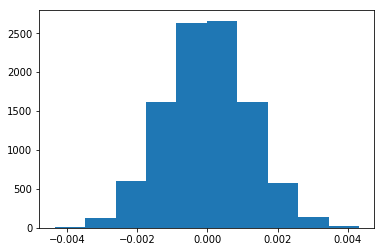

In [28]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

In [29]:
# Create number of users with all new_page users and all new_page users
conv_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
conv_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# Compute actual converted rate
actual_cvt_new = float(conv_new)/ float(n_new) 
actual_cvt_old = float(conv_old)/ float(n_old)

In [30]:
# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

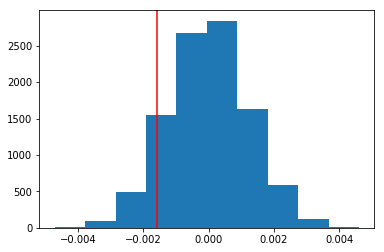

In [32]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='r')

In [33]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_diff).mean()

0.90059999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>Based on the data and with a type I error rate of 5% that the old page has higher probability to convert users, we do not have evidence to reject the null. 

>The p_value is the probability of obtaining our data or more extreme values from the null hypothesis. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm
from scipy.stats import norm

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
n_old = df2.query('group == "control"')['user_id'].nunique()
n_new = df2.query('group == "treatment"')['user_id'].nunique()

convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
#Compute test statistics and p_value using stats.proportions_ztest
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [40]:
#Display z_score and p_value
print('Z-score critical value to reject the null:', str(norm.ppf(1-(0.05/2))))
print('z_score = ' + str(z_score))
print('p_value = ' + str(p_value))

Z-score critical value to reject the null: 1.95996398454
z_score = -1.31092419842
p_value = 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>Since the z-score of 1.31 falls within the range of the critical value of 1.96, I fail to reject the null hypothesis.
>The p_value of around 0.905 is pretty close to the one computed manually in parts j. and k, which it is also larger than the alpha value of 0.05, meaning that in both methods, built-in and manual, lead to the same conclusion. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic regression is the type of regression that I should be performing in this case to predict a categorial response. 


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
#Add intercept column
df2['intercept'] = 1

#Create dummy variables for landing page in which an individual receives 1 for the treatment and 0 for the control groups.   
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(['drop'], axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [50]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [51]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 31 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        20:28:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [52]:
#To interpret this result we need to exponentiate it
np.exp(-0.0150)

0.98511193960306265

For each unit increase in ab_page, conversion is 0.985 times likely to happen, holding alll else constant. Not much impact

In [55]:
#Compute reciprocal for ab_page
1/np.exp(-0.0150)

1.0151130646157189

For every unit decrease in ab_page, conversion is 1.015 times as likely holding all else constant. Not much of an impact either

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br>

> The p-value from the built-in ztest method was ~0.90. (Part II) 
  The p-value associated with ab_page in this regression model is 0.19. 
  <br>
> The values differ due to the fact that in Part II, the hypothesis that we tested was trying to prove that our new_page had a higher conversion rate than the old_page; whereas in Part III, we are basically predicting that there is a difference of conversion between the two pages of some sort. 

> In **part II**, **the null hypothesis (H0)** states that there is no statistical significance in the conversion of a user at either receiving the new_page or the old_page. While **the alternative hypothesis (H1)** attempts to prove that the new page is more effective at converting users than the old page.

>In **part III**, **the null hypothesis (H0)** associated with a logistic regression is that there is no relationship between the page shown to a user (dependent variable) and the conversion rate (independent variable). Therefore, **the alternative hypothesis (H1)** would be that there is a relationship of some sort.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>The addition of other factors could help in a better prediction and better understanding on what we are trying to achieve as a goal.

> For example: 
Depeding on our business, a conversion might have different meanings. In a blog, it could mean the number of clicks an articles receives, in a sales platform, it could mean how many of our visits actually bought one of our products or if you have a service, it might mean how many of those visits subscribed to your emailing list. For each of them, the position of certain elements, the use of pictures or the use of certain colors could actually improve our converstion rate. 

> If your customer base is international, you might be interested on using cultural differences to influence your design since they can affect a wide range of factors such as eCommerce trust, marketing, communication as well as the UX/UI of a product. To learn more, check this article by Jenny Shen about Cross Cultural Design: https://www.toptal.com/designers/business-website-design/cross-cultural-design

> Disadvantages of adding terms into the regression model:
> 1.  Sometimes bivariate relationships are not always significant in a regression model, and the "relationship" between them, dissapears.
> 2.  We could falsely conclude that a correlation is a casuation.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [63]:
#Import countries dataframe
countries_df = pd.read_csv('countries.csv')
countries_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [57]:
#Merge together countries dataframe and df2 from the previous exercise
df3 = df2.merge(countries_df, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [71]:
#Generate dummy variables for the country columns
df3[['CA','UK', 'US']] = pd.get_dummies(df3['country'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

### a. Interaction Terms ( Country vs Page conversion)

In [72]:
#Create regression model looking at the individual factors of country and page on conversion. 
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US']])

#Fit the new model
results_c = logit_mod2.fit()
results_c.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 31 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        23:22:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

> All the p_values are greater than 0.05, suggesting that there is no significant relationship between the explanatory variables and the response variable. 

In [73]:
#Exponentiate results
np.exp(results_c.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

> Canada was the baseline of this model since it was the variable that wasn't included. So, we can interpret that according to the data, US users are ~1.04 time more likely to convert than Canadian users and UK users are ~1.05 more times likely to convert than Canadian users.  

>In conclusion, the effect is not statistically significant, since it seems there is no much difference between the different countries.

### b. Interaction Terms ( Page and Country)

In [74]:
#Create 3 separate columns for the interaction of ab_page and country
df3['CA_trt'] = df3['ab_page'] * df3['CA']
df3['UK_trt'] = df3['ab_page'] * df3['UK']
df3['US_trt'] = df3['ab_page'] * df3['US']

In [76]:
#Display the first 5 results of updated dataframe
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,CA,CA_trt,UK_trt,US_trt
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0,0,0


In [78]:
#Create new logistic regression model using the new variables 'UK_trt', 'US_trt', using 'CA' and 'CA_trt' as baseline
logit_mod3 = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US', 'UK_trt', 'US_trt']])

#Fit new model
results_ctrt = logit_mod3.fit()

#Display summary of results
results_ctrt.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 May 2019   Pseudo R-squ.:               2.691e-05
Time:                        23:29:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
US             0.0511      0.028      1.841      0.066      -0.003       0.105
UK_trt         0.0108      0.023      0.475      0.635      -0.034       0.056
US_trt        -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

> All p_values are higher than 0.05, suggesting that none of these variables are statistically significant.

<a id='conclusions'></a>
## Conclusions

> Based on the data, we can conclude that there is lack of statistical significance of coversion on users using the new page design, in other words, the e-commerce company should keep the old web page design, since throughout our analysis, we came to the conclusion that we do not have enough evidence to reject the null hypothesis, which states that the old_page is just as good if not better than the new_page.


In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0